In [1]:
# Stripplot of PKR functional scores at sites with previously characterized variants
# Seo 2008 variants
# Supplemental Figure S8

In [6]:
import os
import random
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# figure save directory
save_dir = "../../results/figures/previously-characterized"
os.makedirs(save_dir, exist_ok=True)

In [8]:
input_file = '../../results/barseq/pkr-variant-reads_240228.csv'
df = pd.read_csv(input_file)

In [ ]:
def pkr_type(x, pkr_stop = 551):
    if x[-1] == "*" and int(x.split('-')[1][1:-1]) < pkr_stop:
        return "Nonsense"
    elif x[-2:] == 'WT':
        return "WT"
    else:
        return 'Variant'
df['pkr_type'] = df['pkr'].apply(pkr_type)

# label dever sites Seo 2008
dever_sites = [375,378, 382, 405, 448, 455, 473, 480, 486, 491, 504, 524]
dever_variants = ['PKR-E375V','PKR-I378T', 'PKR-R382I', 'PKR-I405M', 'PKR-S448G', 'PKR-M455V', 'PKR-A473T', 'PKR-E480D', 'PKR-D486V', 'PKR-T491S', 'PKR-S504L', 'PKR-E524V']

tested_dever_sites = sorted(list(set(df.query('pkr != "PKR-WT"')['site'].astype(int).tolist()).intersection(set(dever_sites))))

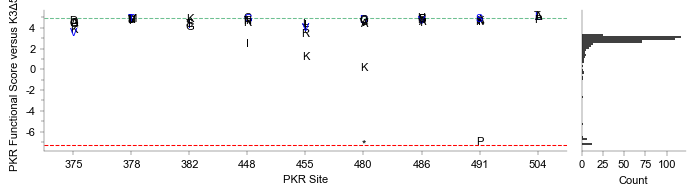

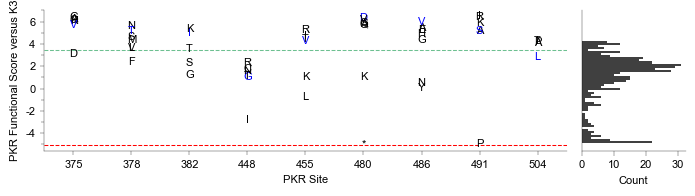

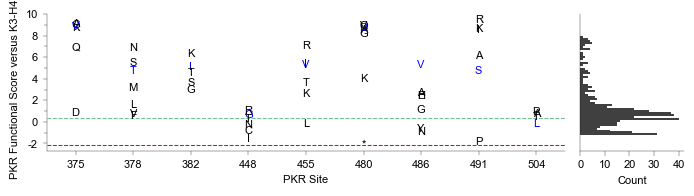

In [13]:
for k3, k3_name in zip(['K3L-Null','K3L-WT','K3L-H47R'],["K3Δ58","K3","K3-H47R"]):

    width_in = 7
    height_in = 2
    font_size = 8
    font = 'Arial'
    stroke=.25
    tick_len = 3
    
    temp_df = df.pivot_table(index=['pkr','site','wt_aa', 'var_aa'], columns='k3', values='auc_mean').reset_index()
    temp_df = temp_df[temp_df.site.isin(dever_sites)]
    temp_df['site'] = temp_df.site.astype(int).astype(str)
    
    site_list = sorted(temp_df['site'].unique().tolist())
    
    # Create subplots with different widths
    font = {'family': font, 'size': font_size}
    plt.rc('font', **font)
    plt.rc('lines', linewidth=stroke)
    fig, axes = plt.subplots(1, 2, figsize=(width_in, height_in), gridspec_kw={'width_ratios': [5, 1]})
    
    
    # Stripplot
    sns.stripplot(
        data=temp_df,
        x='site', 
        y=k3, 
        jitter=.5,
        marker="",
        alpha=1,
        color='red',
        ax=axes[0],
        order=site_list
    )

    # y tick limits
    if k3 == "K3L-Null":
        plt.ylim(-8, 8)
    elif k3 == "K3L-WT":
        plt.ylim(-6, 10)
    elif k3 == "K3L-H47R":
        plt.ylim(-4, 12)

    # Set major ticks at even numbers and label as integers
    axes[0].yaxis.set_major_locator(plt.MultipleLocator(2))
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))
    
    # Show minor ticks for every integer
    axes[0].yaxis.set_minor_locator(plt.MultipleLocator(1))

    # Set major tick length
    axes[0].tick_params(axis='both', direction='out', length=tick_len, width=stroke)
    axes[0].yaxis.set_tick_params(width=stroke, which='both', direction='out')
    
    # horizontal K3L-WT dashed lines
    h_non = df.query('pkr_type == "Nonsense" and k3 == @k3')['auc_mean'].mean()
    h_wt = df.query('k3 == @k3 and pkr == "PKR-WT"')['auc_mean'].values[0]
    
    axes[0].axhline(y=h_non, color='red', linestyle='--', linewidth=.75, zorder=0)
    axes[0].axhline(y=h_wt, color='#6dc091', linestyle='--', linewidth=.75, zorder=0)
    
    # Add labels for each point
    for index, row in temp_df.iterrows():
        color = 'blue' if row['pkr'] in dever_variants else 'black'
        axes[0].text(row['site'], row[k3], row['var_aa'], ha='center', va='center', font=font, fontsize=font_size, color=color)
    
    axes[0].set_xlabel('PKR Site')
    axes[0].set_ylabel(f'PKR Functional Score versus {k3_name}')
    
    # HISTOGRAM
    temp_df = df.query('pkr_type != "Nonsense"')
    temp_df = temp_df.pivot_table(index=['pkr','site','wt_aa', 'var_aa'], columns='k3', values='auc_mean').reset_index()
    
    sns.histplot(
        data=temp_df, 
        y=k3, 
        bins=50, 
        color='black',
        edgecolor=None,
        ax=axes[1]
    )
    
    axes[1].set_ylabel('')
    axes[1].set_yticks([])

    # Set major ticks at even numbers and label as integers
    if k3 == "K3L-Null":
        axes[1].xaxis.set_major_locator(plt.MultipleLocator(25))
    else:
        axes[1].xaxis.set_major_locator(plt.MultipleLocator(10))
    axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))

    # modify 
    axes[1].xaxis.set_tick_params(width=stroke, which='both', direction='out')

    
    # modify plots
    for i in range(2):
        axes[i].spines['top'].set_visible(False)
        axes[i].spines['right'].set_visible(False)
        axes[i].spines['left'].set_linewidth(stroke)
        axes[i].spines['bottom'].set_linewidth(stroke)
    
    plt.tight_layout()

    # save plot
    plot_name = f'previously-characterized-sites_{k3_name}_{width_in}x{height_in}.svg'
    output_file = os.path.join(save_dir, plot_name)
    plt.savefig(output_file, bbox_inches='tight', format='svg', transparent=True)
        
    plt.show()